# Unit 5 - Financial Planning

In [99]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json 
%matplotlib inline

## Part 1 - Personal Finance Planner

In [100]:
# Load .env enviroment variables
load_dotenv()

True

In [101]:
api_key=os.getenv("ALPACA_API_KEY")
type(api_key)

str

### Collect Crypto Prices Using the `requests` Library

In [102]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [103]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [104]:
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [105]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()

print(json.dumps(response_btc, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19443081,
            "id": 1,
            "last_updated": 1690719286,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 570032056521,
                    "percent_change_1h": 0.178125086130402,
                    "percent_change_24h": 0.158742680584607,
                    "percent_change_7d": -1.92373166991241,
                    "percentage_change_1h": 0.178125086130402,
                    "percentage_change_24h": 0.158742680584607,
                    "percentage_change_7d": -1.92373166991241,
                    "price": 29317.0,
                    "volume_24h": 3976456175
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19443081,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [106]:


# Fetch current ETH price
response_eth = requests.get(eth_url).json()

print(json.dumps(response_eth, indent=4, sort_keys=True))



{
    "data": {
        "1027": {
            "circulating_supply": 120181083,
            "id": 1027,
            "last_updated": 1690719287,
            "max_supply": 120181083,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 225431593307,
                    "percent_change_1h": 0.139170566942642,
                    "percent_change_24h": 0.250307804658197,
                    "percent_change_7d": 0.0394427623291854,
                    "percentage_change_1h": 0.139170566942642,
                    "percentage_change_24h": 0.250307804658197,
                    "percentage_change_7d": 0.0394427623291854,
                    "price": 1875.75,
                    "volume_24h": 3207642030
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120181083,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_c

In [107]:
# current price of BTC
btc_price = response_btc['data']['1']['quotes']['USD']['price']
#print current BTC price 
print(f'Current price of BTC: ${btc_price:,}')


Current price of BTC: $29,317.0


In [108]:
# current price of ETH
eth_price = response_eth['data']['1027']['quotes']['USD']['price']
#print current ETH price 
print(f'Current price of ETH: ${eth_price:,}')


Current price of ETH: $1,875.75


In [109]:
# Compute current value of my crpto
eth_value = my_eth * eth_price
btc_value = my_btc * btc_price

In [110]:
# print value of my BTC and ETH
print(f'Current value of your holding in BTC: ${btc_value:,.2f}')
print(f'Current value of your holding in ETH: ${eth_value:,.2f}')

Current value of your holding in BTC: $35,180.40
Current value of your holding in ETH: $9,941.48


In [111]:
#compute total value of my crypto 
wallet = btc_value + eth_value

# Print current crypto wallet balance
print(f'Cryptocurrency wallet balance: ${wallet:,.2f}')

Cryptocurrency wallet balance: $45,121.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [112]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [113]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [114]:
# Format current date as ISO format
start_date = pd.Timestamp('2023-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
current_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_current_price = current_prices_df[current_prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
agg_current_price = current_prices_df[current_prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

current_prices_df = pd.concat([spy_current_price, agg_current_price], axis=1, keys=['SPY', 'AGG'])


# Preview DataFrame
current_prices_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-06-01 04:00:00+00:00  418.09  422.92  416.79  421.82  88865018   

                                                    AGG                       \
                          trade_count        vwap  open  high     low  close   
timestamp                                                                      
2023-06-01 04:00:00+00:00      653408  420.462598  98.6  98.8  98.484  98.61   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-06-01 04:00:00+00:00  9029803       28815  98.605871

In [115]:
# Pick AGG and SPY close prices
agg_close_price = float(current_prices_df['AGG']['close'])
spy_close_price = float(current_prices_df['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.61
Current SPY closing price: $421.82


In [116]:
# Compute the current value of shares
agg_value = my_agg * agg_close_price

spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21091.00
The current value of your 200 AGG shares is $19722.00


In [117]:
# add shares value

total_shares = agg_value + spy_value
print(f'Current balance of the shares portion : ${total_shares:,.2f}')

Current balance of the shares portion : $40,813.00


### Savings Health Analysis

In [118]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data
total_portfolio = [wallet, total_shares]

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio, columns=['amount'], index=['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,45121.875
shares,40813.000


<Axes: title={'center': 'Portfolio - 2023-06-01'}, ylabel='amount'>

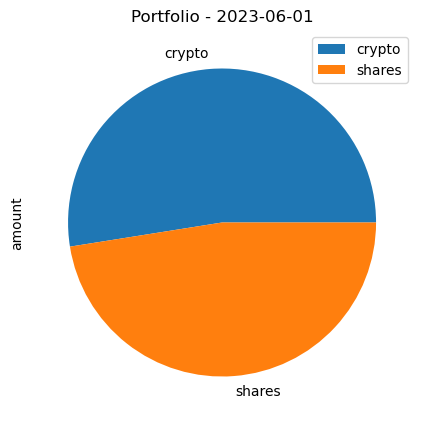

In [119]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Portfolio - 2023-06-01', figsize=(10,5))

In [120]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_portfolio = df_savings['amount'].sum()

# Validate saving health

if total_portfolio > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

   

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [122]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-01', tz='America/New_York').isoformat()

In [139]:
# Get 5 years' worth of historical data for SPY and AGG
five_year_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_five_year = five_year_prices_df[five_year_prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)
agg_five_year = five_year_prices_df[five_year_prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
five_year_prices_df = pd.concat([spy_five_year, agg_five_year], axis=1, keys=['SPY', 'AGG'])

# Display sample data
display(five_year_prices_df.head())
display(five_year_prices_df.tail())

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-06-03 04:00:00+00:00  275.32  276.5521  273.09  274.61  96584146   
2019-06-04 04:00:00+00:00  277.12  280.6800  276.62  280.49  77767889   
2019-06-05 04:00:00+00:00  282.33  282.9900  280.32  282.87  71374498   
2019-06-06 04:00:00+00:00  283.29  285.5500  282.57  284.78  69855780   
2019-06-07 04:00:00+00:00  285.93  288.8500  285.74  287.58  74283295   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-06-03 04:00:00+00:00      492872  274.759710  110.26  110.515  110.1725   
2019-06-04 04:00:00+00:00      377640  278.845031  110.28  110.380  110.1300   
2019-06-05 04:00:00+00:00      327592  281.929760  110.36  110.470  110.2300   
2019-06-06 04:00:00+00:00      303395  284.047267  110.34  110.420  110.1600   
2019-06-07 04:00:00+00:00      337830  287.477283  110.64  110.670  110.4500   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-06-03 04:00:00+00:00  110.40  7137903       24829  110.336235  
2019-06-04 04:00:00+00:00  110.30  5131883       17516  110.222673  
2019-06-05 04:00:00+00:00  110.24  3253509       11960  110.281745  
2019-06-06 04:00:00+00:00  110.22  2660352        9748  110.279416  
2019-06-07 04:00:00+00:00  110.53  3697054       12233  110.530069

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2023-05-25 04:00:00+00:00  414.74  416.16  412.4101  414.65   90961506   
2023-05-26 04:00:00+00:00  415.33  420.77  415.2500  420.02   91809309   
2023-05-30 04:00:00+00:00  422.03  422.58  418.7350  420.18   72229001   
2023-05-31 04:00:00+00:00  418.28  419.22  416.2200  417.85  112750469   
2023-06-01 04:00:00+00:00  418.09  422.92  416.7900  421.82   88865018   

                                                     AGG                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2023-05-25 04:00:00+00:00      672403  413.911478  97.74  97.8000  97.4399   
2023-05-26 04:00:00+00:00      608642  418.901706  97.36  97.5898  97.2406   
2023-05-30 04:00:00+00:00      609403  420.446729  97.90  98.2400  97.8500   
2023-05-31 04:00:00+00:00      665525  418.007600  98.22  98.7200  98.2100   
2023-06-01 04:00:00+00:00      653408  420.462598  98.60  98.8000  98.4840   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2023-05-25 04:00:00+00:00  97.49   5941485       25361  97.570554  
2023-05-26 04:00:00+00:00  97.57   3856699       21361  97.469638  
2023-05-30 04:00:00+00:00  98.22   7349901       26206  98.127983  
2023-05-31 04:00:00+00:00  98.57  10560123       30917  98.475578  
2023-06-01 04:00:00+00:00  98.61   9029803       28815  98.605871

In [144]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCS = MCSimulation(
    portfolio_data=five_year_prices_df,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252*30
)

In [150]:
# Printing the simulation input data
display(MCS.portfolio_data.head())
display(MCS.portfolio_data.tail())

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-06-03 04:00:00+00:00  275.32  276.5521  273.09  274.61  96584146   
2019-06-04 04:00:00+00:00  277.12  280.6800  276.62  280.49  77767889   
2019-06-05 04:00:00+00:00  282.33  282.9900  280.32  282.87  71374498   
2019-06-06 04:00:00+00:00  283.29  285.5500  282.57  284.78  69855780   
2019-06-07 04:00:00+00:00  285.93  288.8500  285.74  287.58  74283295   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-03 04:00:00+00:00      492872  274.759710          NaN  110.26   
2019-06-04 04:00:00+00:00      377640  278.845031     0.021412  110.28   
2019-06-05 04:00:00+00:00      327592  281.929760     0.008485  110.36   
2019-06-06 04:00:00+00:00      303395  284.047267     0.006752  110.34   
2019-06-07 04:00:00+00:00      337830  287.477283     0.009832  110.64   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-06-03 04:00:00+00:00  110.515  110.1725  110.40  7137903       24829   
2019-06-04 04:00:00+00:00  110.380  110.1300  110.30  5131883       17516   
2019-06-05 04:00:00+00:00  110.470  110.2300  110.24  3253509       11960   
2019-06-06 04:00:00+00:00  110.420  110.1600  110.22  2660352        9748   
2019-06-07 04:00:00+00:00  110.670  110.4500  110.53  3697054       12233   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-03 04:00:00+00:00  110.336235          NaN  
2019-06-04 04:00:00+00:00  110.222673    -0.000906  
2019-06-05 04:00:00+00:00  110.281745    -0.000544  
2019-06-06 04:00:00+00:00  110.279416    -0.000181  
2019-06-07 04:00:00+00:00  110.530069     0.002813

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2023-05-25 04:00:00+00:00  414.74  416.16  412.4101  414.65   90961506   
2023-05-26 04:00:00+00:00  415.33  420.77  415.2500  420.02   91809309   
2023-05-30 04:00:00+00:00  422.03  422.58  418.7350  420.18   72229001   
2023-05-31 04:00:00+00:00  418.28  419.22  416.2200  417.85  112750469   
2023-06-01 04:00:00+00:00  418.09  422.92  416.7900  421.82   88865018   

                                                                  AGG  \
                          trade_count        vwap daily_return   open   
timestamp                                                               
2023-05-25 04:00:00+00:00      672403  413.911478     0.008660  97.74   
2023-05-26 04:00:00+00:00      608642  418.901706     0.012951  97.36   
2023-05-30 04:00:00+00:00      609403  420.446729     0.000381  97.90   
2023-05-31 04:00:00+00:00      665525  418.007600    -0.005545  98.22   
2023-06-01 04:00:00+00:00      653408  420.462598     0.009501  98.60   

                                                                          \
                              high      low  close    volume trade_count   
timestamp                                                                  
2023-05-25 04:00:00+00:00  97.8000  97.4399  97.49   5941485       25361   
2023-05-26 04:00:00+00:00  97.5898  97.2406  97.57   3856699       21361   
2023-05-30 04:00:00+00:00  98.2400  97.8500  98.22   7349901       26206   
2023-05-31 04:00:00+00:00  98.7200  98.2100  98.57  10560123       30917   
2023-06-01 04:00:00+00:00  98.8000  98.4840  98.61   9029803       28815   

                                                   
                                vwap daily_return  
timestamp                                          
2023-05-25 04:00:00+00:00  97.570554    -0.003679  
2023-05-26 04:00:00+00:00  97.469638     0.000821  
2023-05-30 04:00:00+00:00  98.127983     0.006662  
2023-05-31 04:00:00+00:00  98.475578     0.003563  
2023-06-01 04:00:00+00:00  98.605871     0.000406

In [157]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MCS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 110.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 120.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 130.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 140.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 150.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 160.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 170.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 180.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 190.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 200.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 210.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 220.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 230.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 240.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 250.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 260.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 270.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 280.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 290.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 300.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 310.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 320.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 330.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 340.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 350.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 360.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 370.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 380.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 390.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 400.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 410.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 420.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 430.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 440.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 450.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 460.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 470.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 480.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 490.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995866,0.991379,0.996716,0.995106,1.015482,1.009045,1.008756,1.003629,0.994552,1.006826,...,0.996432,1.011778,1.005375,1.008336,1.012653,0.991979,0.991746,0.994775,1.001414,1.006427
2,0.999706,0.990490,1.006375,0.987871,1.024941,1.014592,1.001960,0.993733,0.999693,1.005311,...,0.999576,1.015064,1.013220,1.011704,1.013886,0.972900,0.994305,0.987830,0.987617,0.995784
3,1.006330,0.983757,0.998151,0.988503,1.023196,1.019175,0.996054,1.000476,1.005299,0.993325,...,0.997486,1.018146,1.001462,1.002664,1.001326,0.953301,0.998983,0.988044,0.987915,0.994112
4,1.002818,0.991719,0.987447,0.989990,1.033711,1.013049,0.999152,0.995453,1.012616,0.989476,...,0.999369,1.014891,1.002689,1.005257,1.009236,0.956793,1.007212,0.981409,0.985094,0.988450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.456037,3.170523,1.421969,6.806883,10.986819,5.036696,4.885788,10.997267,3.479409,7.936635,...,6.530298,6.308860,7.933193,22.498216,1.841737,21.252328,7.761876,16.673704,3.695984,13.511102
7557,6.480924,3.169616,1.431324,6.810183,10.980822,5.084173,4.800626,10.867504,3.497434,7.936789,...,6.538960,6.334259,7.930372,22.456819,1.834783,21.140180,7.896336,16.579152,3.695742,13.513801
7558,6.439502,3.196895,1.437380,6.787415,10.943349,5.038233,4.789627,10.935265,3.494345,7.956382,...,6.516813,6.459664,7.986479,22.351224,1.827621,21.203348,7.856136,16.431891,3.699276,13.357023
7559,6.337992,3.206295,1.449233,6.713928,11.047075,5.036634,4.768389,11.006382,3.491574,7.913798,...,6.492373,6.340083,8.025000,22.012937,1.840132,21.501015,7.937437,16.343503,3.682832,13.445583


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

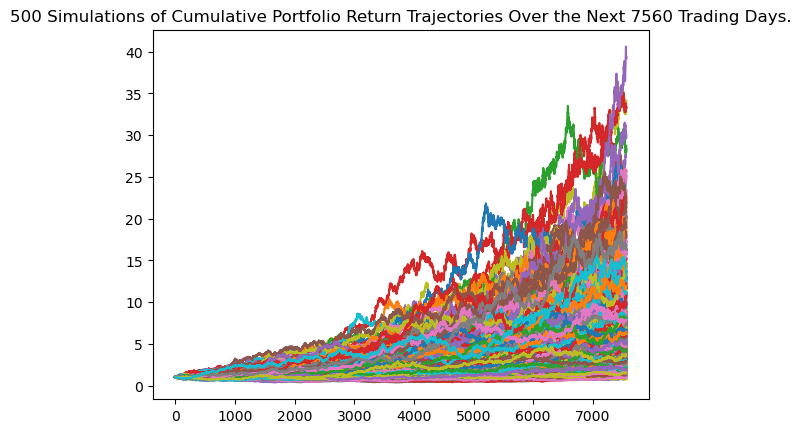

In [158]:
# Plot simulation outcomes
MCS.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

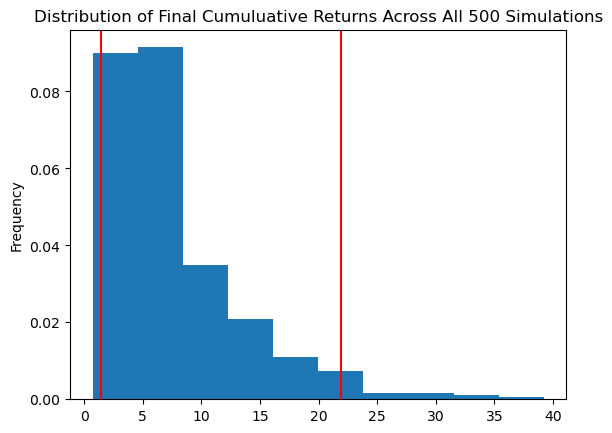

In [159]:
# Plot probability distribution and confidence intervals
MCS.plot_distribution()

### Retirement Analysis

In [162]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_summary = MCS.summarize_cumulative_return()

# Print summary statistics
MCS_summary

/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              7.544077
std               5.707021
min               0.729410
25%               3.621712
50%               5.807943
75%               9.804177
max              39.202622
95% CI Lower      1.455945
95% CI Upper     21.924825
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [173]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_cumulative_return = MCS_summary[8] * initial_investment 
ci_upper_cumulative_return = MCS_summary[9] * initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_cumulative_return:,.2f} and ${ci_upper_cumulative_return:,.2f}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $29,118.91 and $438,496.51.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [175]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_cumulative_return = MCS_summary[8] * initial_investment
ci_upper_cumulative_return = MCS_summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_cumulative_return:,.2f} and ${ci_upper_cumulative_return:,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $43,678.36 and $657,744.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [181]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_portfolio_five = MCSimulation(
    portfolio_data = five_year_prices_df,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [182]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995504,1.009766,0.989476,1.003638,0.994922,1.002931,1.000787,1.001884,0.997624,1.009320,...,0.995856,0.993798,0.995025,1.000566,0.999250,1.003400,0.991256,0.996704,0.992150,1.000546
2,0.998454,1.010304,0.982452,0.995250,0.987189,0.998529,1.003864,1.004153,1.004120,1.022873,...,0.996213,0.993068,0.994305,1.020203,0.994141,0.994746,1.002884,0.997303,0.987756,1.001809
3,1.001839,1.011780,0.985456,0.991731,0.981037,0.994490,1.009755,0.998421,1.000153,1.024550,...,0.998869,1.003811,1.002899,1.014916,0.991492,0.983316,1.012411,0.997871,0.996682,1.007862
4,0.989859,1.008396,0.985213,0.996282,0.988461,1.005912,1.015866,0.996471,1.006919,0.997893,...,0.993409,1.000330,1.007433,1.024308,1.000424,0.975992,1.005129,1.006251,1.000026,1.005645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.072816,1.176431,1.284895,2.112155,0.839780,1.094904,1.279191,1.973886,0.815336,1.354921,...,1.269326,1.951815,1.068220,1.142042,1.755476,1.671440,1.578919,1.154827,1.104888,1.340770
1257,1.067815,1.181001,1.298150,2.109325,0.841537,1.087694,1.286296,1.979550,0.811673,1.357759,...,1.282804,1.966895,1.054548,1.132157,1.758736,1.657658,1.595308,1.166815,1.103839,1.352222
1258,1.066907,1.188294,1.285842,2.117473,0.843065,1.081801,1.278902,1.967963,0.817015,1.353242,...,1.286338,1.966966,1.060409,1.132696,1.749930,1.647505,1.601139,1.154721,1.098601,1.350999
1259,1.071404,1.185371,1.286765,2.114471,0.843997,1.093275,1.283864,1.970064,0.817748,1.375556,...,1.287803,1.958302,1.061615,1.140558,1.757697,1.649171,1.580118,1.151038,1.096025,1.347546


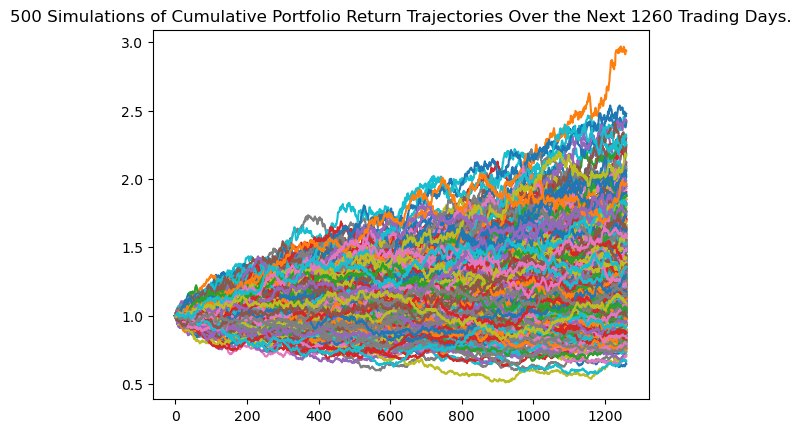

In [183]:
# Plot simulation outcomes
line_plot_five = MC_portfolio_five.plot_simulation()

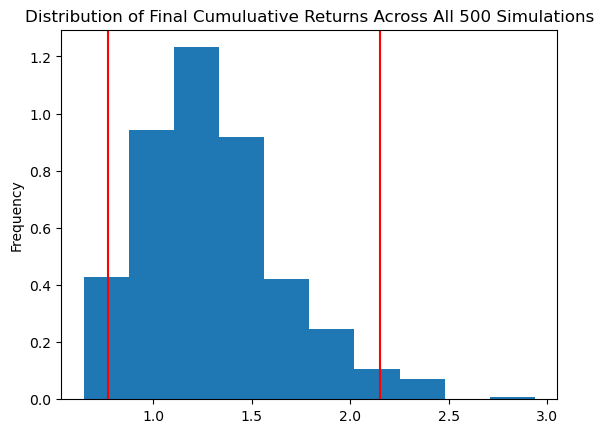

In [184]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_portfolio_five.plot_distribution()

In [185]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_five = MC_portfolio_five.summarize_cumulative_return()

# Print summary statistics
print(summary_five)

count           500.000000
mean              1.300184
std               0.353001
min               0.648296
25%               1.045416
50%               1.246266
75%               1.491077
max               2.936915
95% CI Lower      0.770342
95% CI Upper      2.148550
Name: 1260, dtype: float64


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [186]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_five[8]*initial_investment,2)
ci_upper_five = round(summary_five[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46220.53 and $128912.98


### Ten Years Retirement Option

In [187]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_portfolio_ten = MCSimulation(
    portfolio_data = five_year_prices_df,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [188]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MC

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001961,0.990197,0.996036,1.003011,1.012291,1.006059,0.993366,1.004982,1.001927,0.999667,...,0.989666,1.007029,0.993208,1.008730,1.001073,1.014239,0.998378,1.004275,1.009374,1.008798
2,1.009978,0.986583,0.999944,0.991558,1.018497,1.008742,0.988991,1.005581,1.000453,0.997637,...,0.997156,1.003583,0.985327,1.011505,1.001327,1.002828,1.014765,0.994816,1.019791,1.029174
3,1.010848,0.992688,1.007054,0.989938,1.022988,1.000112,0.979397,1.016828,1.000530,0.994143,...,0.982441,1.002585,0.984333,1.016763,1.014503,0.996991,1.003228,0.992714,1.026244,1.028201
4,1.000266,0.982600,0.992791,0.994679,1.020488,1.001890,0.986185,1.012988,1.005871,1.000295,...,0.987461,0.997181,0.979390,1.028568,1.006261,0.985183,0.988018,0.996448,1.021252,1.013158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.829637,1.413652,0.743039,1.401667,1.559869,1.336766,1.466145,1.232257,1.007002,1.067546,...,1.153486,1.727374,1.509326,1.575474,1.085335,0.787967,0.972809,1.216813,1.145413,1.577881
1257,0.829784,1.398338,0.743654,1.387301,1.580600,1.344162,1.452716,1.231370,1.000449,1.059750,...,1.142811,1.728686,1.500082,1.576178,1.086102,0.792626,0.981347,1.213742,1.138542,1.590834
1258,0.824305,1.408526,0.744041,1.382585,1.575964,1.343346,1.475728,1.229362,0.998765,1.052400,...,1.146612,1.743424,1.487879,1.597263,1.090103,0.782396,0.992909,1.204071,1.129970,1.575566
1259,0.840877,1.420615,0.756094,1.383087,1.591116,1.345603,1.476089,1.219820,0.994315,1.044462,...,1.155441,1.731193,1.502196,1.586078,1.078306,0.784370,0.992317,1.205580,1.139405,1.568159


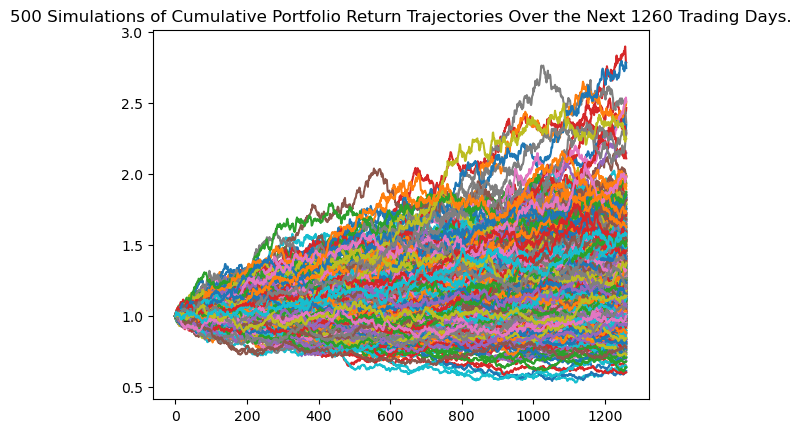

In [189]:
# Plot simulation outcomes
line_plot_ten = MC_portfolio_ten.plot_simulation()

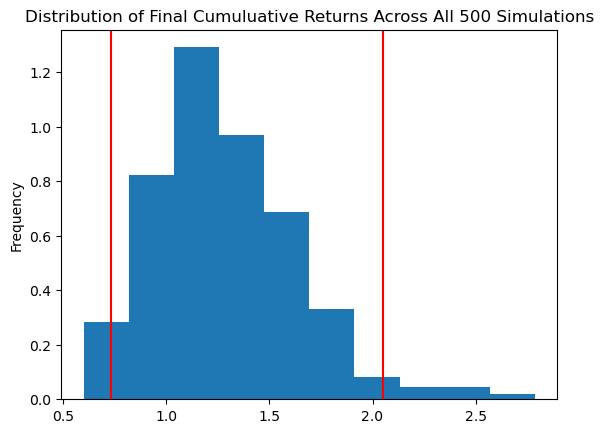

In [190]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_portfolio_ten.plot_distribution()

In [192]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = MC_portfolio_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_ten)

count           500.000000
mean              1.291174
std               0.345453
min               0.602695
25%               1.051959
50%               1.235817
75%               1.492190
max               2.785796
95% CI Lower      0.734278
95% CI Upper      2.052788
Name: 1260, dtype: float64


/Users/staceysimko/UNCC-VIRT-FIN-PT-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [193]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $44056.69 and $123167.28
